In [10]:
from pandas import read_excel
import numpy as np
from numpy import concatenate
from datetime import datetime
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error

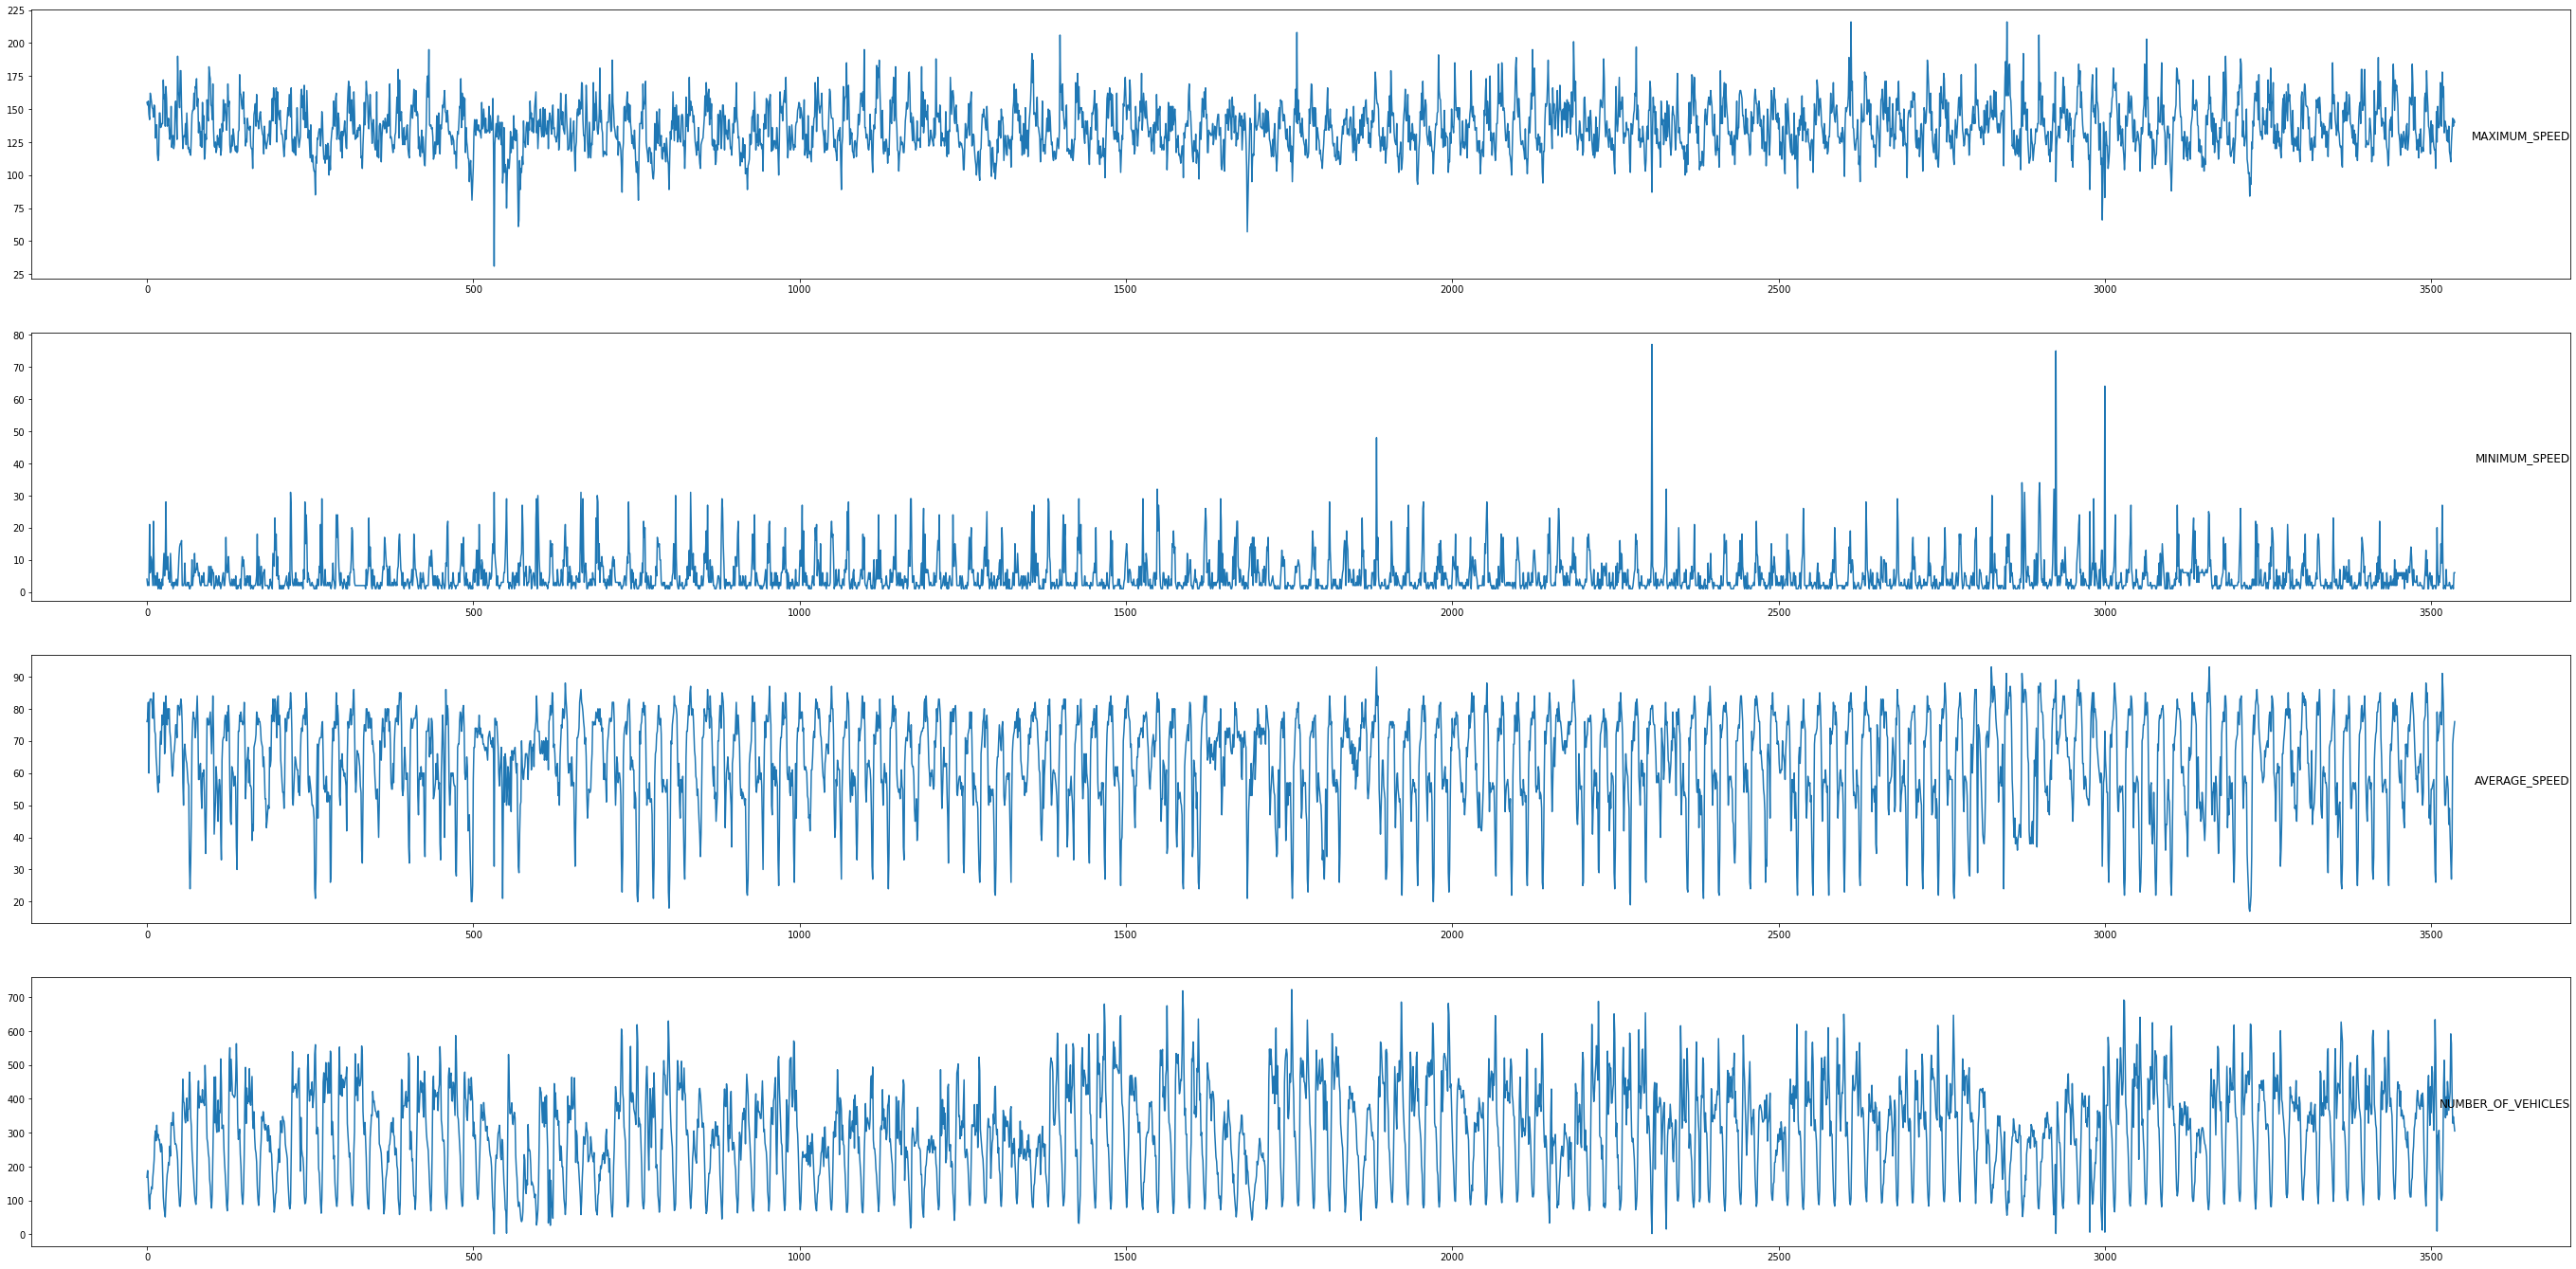

In [11]:
# load dataset
dataset = read_excel(r'C:\sxk9gd_6ay.xlsx', header=0, index_col=0)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure(figsize=(48, 24))
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()

In [12]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
                cols.append(df.shift(i))
                names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
                cols.append(df.shift(-i))
                if i == 0:
                        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
                else:
                        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
                agg.dropna(inplace=True)
        return agg

In [13]:
# specify the number of lag hours
n_hours = 6
n_steps = 3
n_features = 4
n_obs = n_hours * n_features
n_x = (n_hours * n_features) - n_steps
# frame as supervised learning
reframed = series_to_supervised(values, n_hours, n_steps)
# drop columns we don't want to predict

for i in range (0,n_steps):
   reframed.drop(reframed.columns[[n_obs+i,n_obs+i+1,n_obs+i+3]], axis=1, inplace=True) 

reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),...,var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var3(t),var3(t+1),var3(t+2)
6,155.0,4.0,76.0,168.0,153.0,2.0,77.0,188.0,156.0,3.0,...,21.0,82.0,74.0,162.0,6.0,83.0,117.0,83.0,83.0,81.0
7,153.0,2.0,77.0,188.0,156.0,3.0,82.0,150.0,146.0,2.0,...,6.0,83.0,117.0,159.0,11.0,83.0,120.0,83.0,81.0,77.0
8,156.0,3.0,82.0,150.0,146.0,2.0,60.0,101.0,142.0,21.0,...,11.0,83.0,120.0,155.0,10.0,83.0,140.0,81.0,77.0,85.0
9,146.0,2.0,60.0,101.0,142.0,21.0,82.0,74.0,162.0,6.0,...,10.0,83.0,140.0,151.0,6.0,81.0,134.0,77.0,85.0,78.0
10,142.0,21.0,82.0,74.0,162.0,6.0,83.0,117.0,159.0,11.0,...,6.0,81.0,134.0,150.0,2.0,77.0,169.0,85.0,78.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,126.0,2.0,59.0,352.0,134.0,2.0,58.0,451.0,125.0,2.0,...,3.0,49.0,391.0,115.0,2.0,41.0,420.0,33.0,27.0,38.0
3531,134.0,2.0,58.0,451.0,125.0,2.0,55.0,420.0,137.0,2.0,...,2.0,41.0,420.0,110.0,1.0,33.0,592.0,27.0,38.0,69.0
3532,125.0,2.0,55.0,420.0,137.0,2.0,44.0,366.0,118.0,3.0,...,1.0,33.0,592.0,125.0,1.0,27.0,563.0,38.0,69.0,72.0
3533,137.0,2.0,44.0,366.0,118.0,3.0,49.0,391.0,115.0,2.0,...,1.0,27.0,563.0,134.0,2.0,38.0,418.0,69.0,72.0,74.0


In [14]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = scaler.fit_transform(reframed)

In [15]:
# split into train and test sets
# %60 Train % 40 Test
TRAIN_SIZE = 0.60
train = reframed[:int(len(reframed)*TRAIN_SIZE), :]
test = reframed[int(len(reframed)*TRAIN_SIZE):, :]

# split into input and outputs
train_X, train_Y = train[:, :n_obs], train[:, -n_steps:]
test_X, test_Y = test[:, :n_obs], test[:, -n_steps:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, len(test_X))

(2117, 24) (2117, 3) (1412, 24) (1412, 3) 1412


In [16]:
def sigmoid_act(x, der=False):
   import numpy as np

   if (der == True):  # Turev sigmoid
      f = 1 / (1 + np.exp(- x)) * (1 - 1 / (1 + np.exp(- x)))

   else:  # sigmoid
      f = 1 / (1 + np.exp(- x))

   return f

def tanh_act(x, der=False):
   import numpy as np

   if (der == True):  # Turev tanh
      f = 1 - np.square(((np.exp(x)) - (np.exp(-x))) / ((np.exp(x)) + (np.exp(-x))))
   else:
      f = ((np.exp(x)) - (np.exp(-x))) / ((np.exp(x)) + (np.exp(-x)))

   return f

def Lineer_act(x, der=False):
   import numpy as np

   if (der == True):  # the derivative of the ReLU is the Heaviside Theta
      f = 1
   else:
      f = x

   return f


In [17]:

m = n_obs    # Gizli Katman Giris neron sayisi
n = 6    # Gizli Katman Durum neron sayisi
q = n_steps    # Cikis Katmani neron sayisi

eta = 2 / 100        # Learning rate
alpha = 9 / 100      # Momentum

#X1 = np.array([0.05,0.025,0.025,0.0025,0.025])        # X1 : x(k-1) baslangic degerleri 0 aliyoruz
X1 = 0.25 * np.random.normal(0, np.sqrt(0.01), n)

Wu2 = np.zeros((n, m))              # Wu2 : Wu(k-2) momentum icin
Wu1 = 0.25 * np.random.randn(n, m)  # Wu1 : Wu(k-1)  Gizli Katman Giris Agirlik Degerleri

Wx2 = np.zeros((n, n))              # Wx2 : Wx(k-2) momentum icin
Wx1 = 0.25 * np.random.randn(n, n)  # Wx1 : Wx(k-1) Gizli Katman Durum Agirlik Degerleri
b1 = 0.25 * np.random.randn(n)

Wy2 = np.zeros((q, n))              # Wy2 : Wy(k-2) momentum icin
Wy1 = 0.25 * np.random.randn(q, n)  # Wy1 : Wy(k-1) Cikis Katmani Agirlik Degerleri
bOut = 0.25 * np.random.randn(q)

E_ani_max = []
E_ort = []
epoch = 1000                      # Iterasyon Sayisi


E_ort_degisim= -0.005141434746100217
l= 343


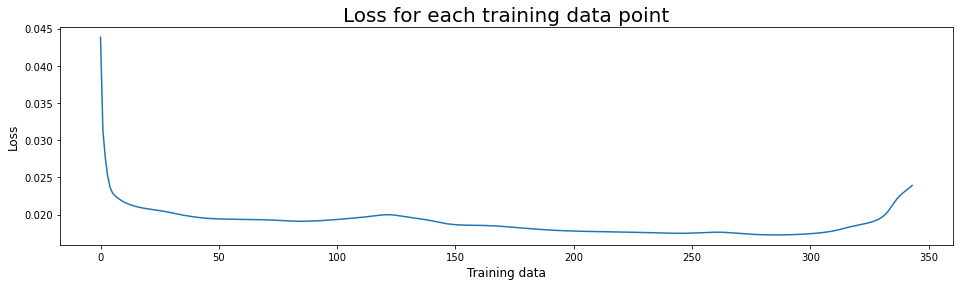

In [18]:
for l in range(epoch):
    E_ani = []
   
    for k in range(np.size(train_X, 0)):
     
      # 1: Egitim Veri Seti Girisi
      
     u = train_X[k]

     # 2: Feed forward
    
     v = np.dot(Wu1, u) + np.dot(Wx1, X1) + b1    
     X1 = tanh_act(v)                 # 1. Katman Cikisi
     y = np.dot(Wy1, X1) + bOut       # Cikis Katmani Cikisi    
     e = train_Y[k] - y
 
    
     # 3: Gradient descent
    
     Wu = Wu1 + (eta * np.dot((np.dot( Wy1.T , e.reshape(q, 1) ) * (tanh_act(v, der=True)).reshape(n,1)) , u.reshape(1, m))) + alpha * (Wu1 - Wu2)
     Wy = Wy1 + (eta * np.dot( e.reshape(q,1) , X1.reshape(1,n))) + alpha * (Wy1 - Wy2)
     Wx = Wx1 + (eta * np.dot((np.dot( Wy1.T , e.reshape(q, 1) ) * (tanh_act(v, der=True)).reshape(n,1)) , X1.reshape(1,n))) + alpha * (Wx1 - Wx2)
    

     Wu2 = Wu1
     Wu1 = Wu
     Wy2 = Wy1
     Wy1 = Wy
     Wx2 = Wx1
     Wx1 = Wx
    
     # 4. loss function Hesaplama
    
     E_ani.append((1 / 2) * np.dot(e.T, e) )

    E_ort.append((1 / np.size(train_X, 0)) * sum(E_ani))
    E_ani_max.append(max(E_ani))
    if l >= 21:
      if abs((E_ort[l - 1]) - (E_ort[l])) <= 0.0000000001 or (E_ort[l - 20]) - (E_ort[l]) <  -0.005  :
          print("E_ort_degisim=", (E_ort[l - 20]) - (E_ort[l]))
          break
#print("E_ort=",E_ort)
print("l=",l)

# 5. Her Iterasyon icin hatayi cizdiriyoruz

plt.figure(figsize=(16, 4))
plt.plot(E_ort)
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()


In [19]:
E_ani_tr = []
E_ort_tr = []
pred_train_Y  = []

# 6. Train Veri Seti Loss hesaplama


for m in range(np.size(train_X, 0)):

    x_tr = train_X[m]   
    v_tr = np.dot(Wu1, x_tr) + np.dot(Wx1, X1) + b1
    X1 = tanh_act(v_tr)                 # 1. Katman Cikisi
    y_tr = np.dot(Wy1, X1) + bOut     # Cikis Katmani Cikisi
    e_tr = train_Y[m] - y_tr    
    pred_train_Y.append(y_tr)
    
   

In [20]:
E_ani_t = []
E_ort_t = []
pred_test_Y  = []

# 7. Test Veri Seti Loss Hesaplama


for m in range(np.size(test_X, 0)):
    
    x_t = test_X[m]   
    v_t = np.dot(Wu1, x_t) + np.dot(Wx1, X1) + b1
    X1 = tanh_act(v_t)                 # 1. Katman Cikisi
    y_t = np.dot(Wy1, X1) + bOut     # Cikis Katmani Cikisi
    e_t = test_Y[m] - y_t    
    pred_test_Y.append(y_t)
    
    

In [21]:
  # Şimdi tahminleri 0-1 ile scale edilmiş halinden geri çeviriyoruz.
#pred_train_Y = np.array(pred_train_y)
pred_train_Y = concatenate((train_X[:, -n_obs:], pred_train_Y), axis=1)
pred_train_Y = scaler.inverse_transform(pred_train_Y)
pred_train_Y = pred_train_Y[:,-n_steps:]

# invert scaling for actual
#train_y = train_y.reshape((len(train_y), n_steps))
train_Y = concatenate((train_X[:, -n_obs:], train_Y), axis=1)
train_Y = scaler.inverse_transform(train_Y)
train_Y = train_Y[:,-n_steps:]

In [22]:
# invert scaling for forecast
pred_test_Y = concatenate(( test_X[:, -n_obs:], pred_test_Y), axis=1)
pred_test_Y = scaler.inverse_transform(pred_test_Y)
pred_test_Y = pred_test_Y[:,-n_steps:]
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), n_steps))
test_Y = concatenate((test_X[:, -n_obs:], test_Y), axis=1)
test_Y = scaler.inverse_transform(test_Y)
test_Y = test_Y[:,-n_steps:]

In [24]:
score_tr = sqrt(mean_squared_error(train_Y, pred_train_Y))
print("Train data score: %.2f RMSE" % score_tr)

score_t = sqrt(mean_squared_error(test_Y, pred_test_Y))
print("Test data score: %.2f RMSE" % score_t)

Train data score: 10.72 RMSE
Test data score: 11.94 RMSE


In [25]:
from sklearn.metrics import mean_absolute_percentage_error

error_mape_tr = 100*mean_absolute_percentage_error(train_Y, pred_train_Y)
print("Train data score: %.2f MAPE" % error_mape_tr)

error_mape_t = 100*mean_absolute_percentage_error(test_Y, pred_test_Y)
print("Test data score: %.2f MAPE" % error_mape_t)
error_mape_t0 = 100*mean_absolute_percentage_error(test_Y[:,0], pred_test_Y[:,0])
print("Test t zamanı score: %.2f MAPE" % error_mape_t0)
error_mape_t1 = 100*mean_absolute_percentage_error(test_Y[:,1], pred_test_Y[:,1])
print("Test t+1 zamanı score: %.2f MAPE" % error_mape_t1)
error_mape_t2 = 100*mean_absolute_percentage_error(test_Y[:,2], pred_test_Y[:,2])
print("Test t+2 zamanı score: %.2f MAPE" % error_mape_t2)


Train data score: 14.91 MAPE
Test data score: 17.30 MAPE
Test t zamanı score: 13.99 MAPE
Test t+1 zamanı score: 17.72 MAPE
Test t+2 zamanı score: 20.20 MAPE


In [ ]:
mdape_t = np.median((np.abs(np.subtract(train_Y, pred_train_Y)/ train_Y))) * 100
print("Train data score: %.2f MdAPE" % mdape_t)

mdape_t = np.median((np.abs(np.subtract(test_Y, pred_test_Y)/ test_Y))) * 100
print("Test data score: %.2f MdAPE" % mdape_t)

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

error_smape_tr = smape(train_Y,pred_train_Y)
print("Train data score: %.2f SMAPE" % error_smape_tr)
error_smape_t = smape(test_Y,pred_test_Y)
print("Test data score: %.2f SMAPE" % np.mean(error_smape_t))

In [ ]:
from sklearn.metrics import mean_absolute_error
e_tr = train_Y - pred_train_Y
scale = mean_absolute_error(train_Y[1:], train_Y[:-1])
mase_tr = np.mean(np.abs(e_tr / scale))
print("Train data score: %.2f MASE" % mase_tr)

e_t = test_Y - pred_test_Y
scale = mean_absolute_error(test_Y[1:], test_Y[:-1])
mase_t = np.mean(np.abs(e_t / scale))
print("Test data score: %.2f MASE" % mase_t)

In [ ]:
train_y=train_Y
pred_train_y=pred_train_Y
test_y=test_Y
pred_test_y=pred_test_Y

In [ ]:
# 10. Test Veri Seti icin Ag sonucu ve verili cikislari cizdiriyoruz

train_y1=train_y[:,0]
pred_train_y1=pred_train_y[:,0]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y1, label = "Train verisi t zamanı Tahmin")
plt.plot(train_y1, label = "Train verisi t zamanı Gerçek")
plt.title('Train verisi t zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

test_y1=test_y[:,0]
pred_test_y1=pred_test_y[:,0]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y1, label = "Test verisi t zamanı Tahmin")
plt.plot(test_y1, label = "Test verisi t zamanı Gerçek")
plt.title('Test verisi t zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

train_y2=train_y[:,1]
pred_train_y2=pred_train_y[:,1]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y2, label = "Train verisi t+1 zamanı Tahmin")
plt.plot(train_y2, label = "Train verisi t+1 zamanı Gerçek")
plt.title('Train verisi t+1 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')


test_y2=test_y[:,1]
pred_test_y2=pred_test_y[:,1]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y2, label = "Test verisi t+1 zamanı Tahmin")
plt.plot(test_y2, label = "Test verisi t+1 zamanı Gerçek")
plt.title('Test verisi t+1 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

train_y3=train_y[:,2]
pred_train_y3=pred_train_y[:,2]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y3, label = "Train verisi t+2 zamanı Tahmin")
plt.plot(train_y3, label = "Train verisi t+2 zamanı Gerçek")
plt.title('Train verisi t+2 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')